<a href="https://colab.research.google.com/github/Gabikero/C-digo_Maquina/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Maria Gabriela Cáceres

# <center>**KNN-Vecinos más cercanos K**<center>

*Cuando funciona el modelo y cuando no*

##Importamos librerias y requerimientos

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24

Found existing installation: scikit-learn 0.24.0
Uninstalling scikit-learn-0.24.0:
  Successfully uninstalled scikit-learn-0.24.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.24.0-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

# **PRIMER EJEMPLO**

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


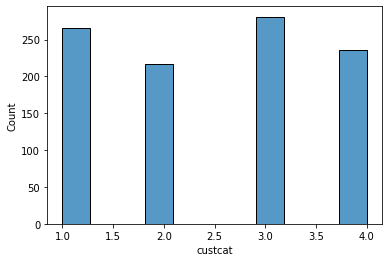

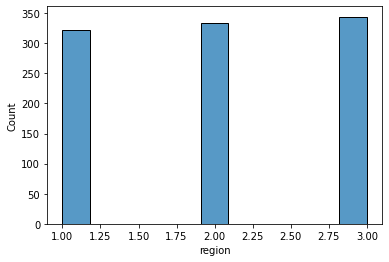

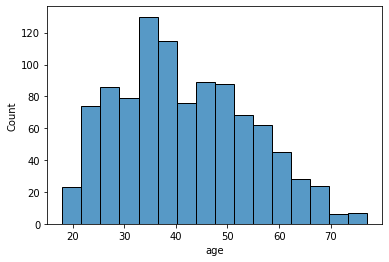

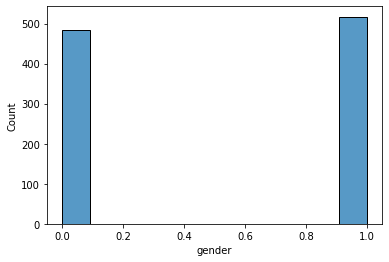

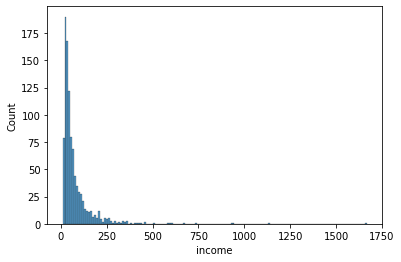

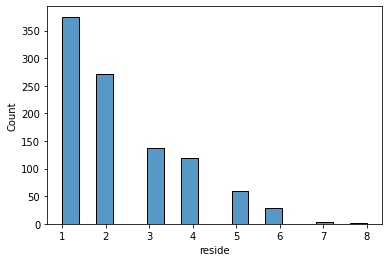

In [ ]:
sns.histplot(data= df, x= 'custcat')
plt.show()

sns.histplot(data= df, x= 'region')
plt.show()

sns.histplot(data= df, x= 'age')
plt.show()

sns.histplot(data= df, x= 'gender')
plt.show()

sns.histplot(data= df, x= 'income')
plt.show()

sns.histplot(data= df, x= 'reside')
plt.show()

In [ ]:
# Frecuencia de custcat
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [ ]:
basico= df[df['custcat']==1]
e= df[df['custcat']==2]
plus= df[df['custcat']==3]
total= df[df['custcat']==4] 

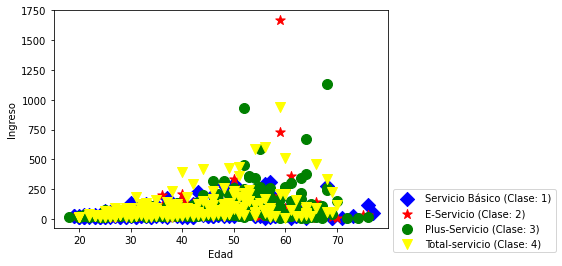

In [ ]:
plt.scatter(basico["age"], basico["income"],
            marker="D", s=100, color="blue",
            label="Servicio Básico (Clase: 1)")

plt.scatter(e["age"], e["income"],
            marker="*", s=100, color="red", 
            label="E-Servicio (Clase: 2)")

plt.scatter(plus["age"], plus["income"],
            marker="o", s=100, color="green", 
            label="Plus-Servicio (Clase: 3)")

plt.scatter(total["age"], total["income"],
            marker="v", s=100, color="yellow", 
            label="Total-servicio (Clase: 4)")

plt.ylabel("Ingreso")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

Se observa que no hay separación lineal de los datos

In [ ]:
# Generamos la matriz para las varaibles independientes
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [ ]:
#Generamos la matriz para varaibles dependiente(objetivo)
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Normalizamos

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

#Datos: Entrenamiento/Prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) # 20% de los datos son para la prueba
print ('Datos de entrenamienti:', X_train.shape,  y_train.shape)
print ('Datos de prueba:', X_test.shape,  y_test.shape)

Datos de entrenamienti: (800, 11) (800,)
Datos de prueba: (200, 11) (200,)


# Modelo k-Vecimos más Cercanos (KNN)

##Entrenamiento

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

###Con K=4

In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

##Predecimos

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

##Evaluamos

In [ ]:
from sklearn import metrics
print("TPrecisión de los datos de entrenamientos: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Precisión de los datos de prueba: ", metrics.accuracy_score(y_test, yhat))

TPrecisión de los datos de entrenamientos:  0.5475
Precisión de los datos de prueba:  0.32


###Con K=6

In [ ]:
k = 6
#Modelo y predicción
neigh_ = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_ = neigh_.predict(X_test)
yhat_[0:5]
print("Precisión de Set de Entrenamiento: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Precisión de Set de Test: ", metrics.accuracy_score(y_test, yhat_))


Precisión de Set de Entrenamiento:  0.5475
Precisión de Set de Test:  0.31


Observamos que para los K=6 hay menos precsión para los datos de prueba.

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #TEntrenamiento del Modelo y Entrenamiento 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

###Ploteamos

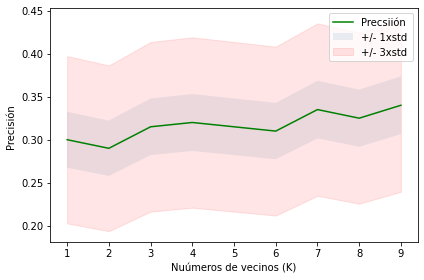

In [ ]:
###Ploteamos
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.legend(('Precsiión ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Precisión ')
plt.xlabel('Nuúmeros de vecinos (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "La mejor precsión es:", mean_acc.max(), "para k=", mean_acc.argmax()+1) 

La mejor precsión es: 0.34 para k= 9


**#SEGUNDO EJEMPLO**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Dataset/fake_bills.csv", sep=';', header=0)
df1

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
df1.shape

(1500, 7)

In [ ]:
df1.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [ ]:
df1.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [ ]:
df1.dropna(inplace= True)
df1.shape

(1463, 7)

In [ ]:
# Replace valores categóricos a numéricos
df1['is_genuine'] = df1['is_genuine'].replace({True: 1, False: 0})

df1

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
df1.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


<AxesSubplot:>

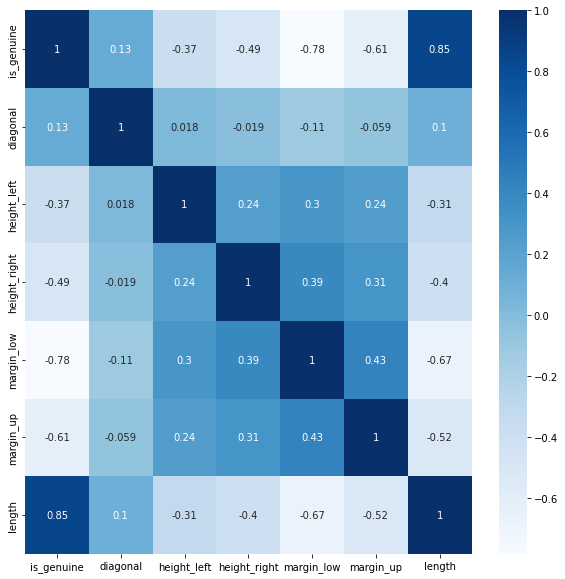

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, cmap = "Blues")

In [ ]:
df1.columns.values

array(['is_genuine', 'diagonal', 'height_left', 'height_right',
       'margin_low', 'margin_up', 'length'], dtype=object)

In [ ]:
# Excluir datos no relevantes, que esten fuera de los cuartiles 1,2,3.
Q1= df1.quantile(0.25) #Identifica el primer cuartil
Q3= df1.quantile(0.75) #Identifica el segundo cuartil
IQR= Q3-Q1  #Rango Intercuartil
print(IQR)
df1= df1[~((df1<(Q1-1.5*IQR)) |(df1>(Q3+1.5*IQR))).any(axis=1)]  #exscluye los que estan fuera de los cuartiles
df1.shape


is_genuine      1.000
diagonal        0.420
height_left     0.405
height_right    0.440
margin_low      0.855
margin_up       0.325
length          1.320
dtype: float64


(1410, 7)

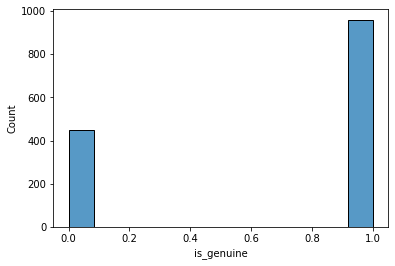

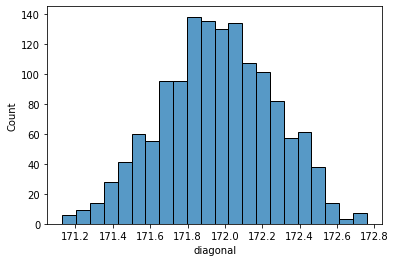

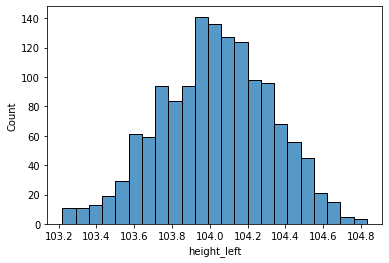

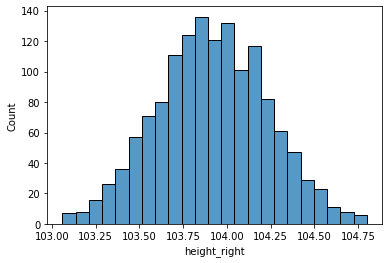

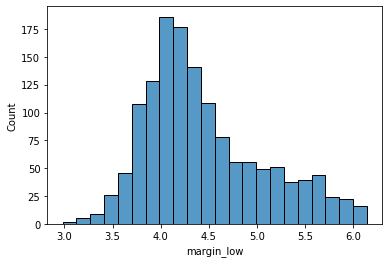

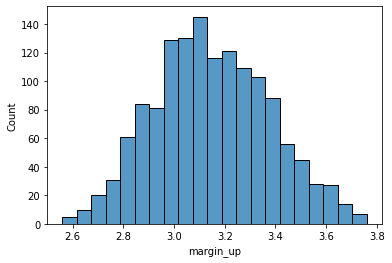

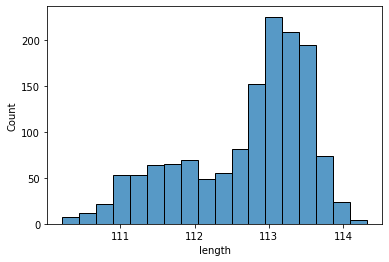

In [ ]:
sns.histplot(data= df1, x= 'is_genuine')
plt.show()

sns.histplot(data= df1, x= 'diagonal')
plt.show()

sns.histplot(data= df1, x= 'height_left')
plt.show()

sns.histplot(data= df1, x= 'height_right')
plt.show()

sns.histplot(data= df1, x= 'margin_low')
plt.show()

sns.histplot(data= df1, x= 'margin_up')
plt.show()

sns.histplot(data= df1, x= 'length')
plt.show()






In [ ]:
genuino = df1[df1["is_genuine"]==1]
falso= df1[df1["is_genuine"]==0]

print('Billetes genuinos: ', genuino.value_counts().sum())
print('Billetes falsos: ', falso.value_counts().sum())

Billetes genuinos:  959
Billetes falsos:  451


#Ploteamos los Genuinos/ Falsos

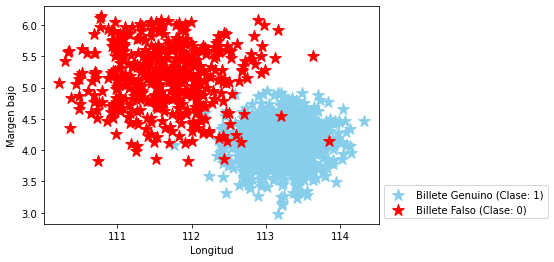

In [ ]:
plt.scatter(genuino["length"], genuino["margin_low"],
            marker="*", s=150, color="skyblue",
            label="Billete Genuino (Clase: 1)")

plt.scatter(falso["length"], falso["margin_low"],
            marker="*", s=150, color="red", 
            label="Billete Falso (Clase: 0)")

plt.ylabel("Margen bajo")
plt.xlabel("Longitud")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

Observamos que puede calalizarse otro modelo, ya que los datos estan bien separados. Sin embargo, usaremos este método para clasificar si es genuino o no el billete de acuerdos a las similutes de los atributos.

In [ ]:
datos = df1[["length", "margin_low"]]
clase = df1["is_genuine"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)

In [ ]:
clasificador = KNeighborsClassifier(n_neighbors=5)

clasificador.fit(datos, clase)

KNeighborsClassifier()

# Nuevo Solicitante de clasificación

Clase: [1]
Probabilidades por clase [[0. 1.]]


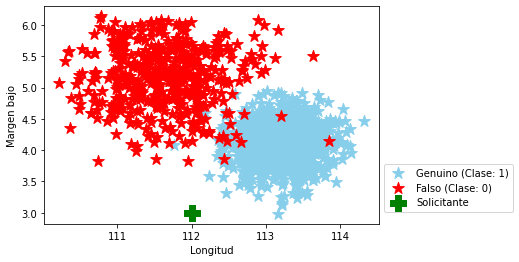

In [ ]:
length = 112
margin_low = 3

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[length, margin_low]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))

#Código para graficar
plt.scatter(genuino["length"], genuino["margin_low"],
            marker="*", s=150, color="skyblue", label="Genuino (Clase: 1)")
plt.scatter(falso["length"], falso["margin_low"],
            marker="*", s=150, color="red", label="Falso (Clase: 0)")
plt.scatter(length, margin_low, marker="P", s=250, color="green", label="Solicitante") 
plt.ylabel("Margen bajo")
plt.xlabel("Longitud")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

Fue clasificado como 1, es decir el billete con atributos:

length = 112

margin_low = 3
      
### <center>***Genuino***<center>